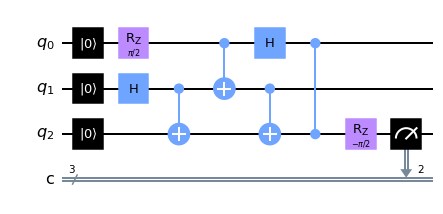

In [2]:
from qiskit import *
import numpy as np
%matplotlib inline

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#Set up circuit to teleport RZ(pi/2)|0\

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.rz(np.pi/2, qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])
circuit.rz(-np.pi/2, qreg_q[2])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw('mpl')

In [26]:
from qiskit import Aer

In [27]:
backend_sim = Aer.get_backend('qasm_simulator')

In [28]:
job_sim = execute(circuit, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [30]:
counts = result_sim.get_counts(circuit)
print(counts)

{'000': 1024}


In [31]:
from qiskit import IBMQ

In [32]:
provider = IBMQ.load_account()

In [33]:
backend_athens = provider.get_backend('ibmq_athens')

In [35]:
#import job monitor
from qiskit.tools.monitor import job_monitor

#execute job on real device backend
job_exp = execute(circuit, backend=backend_athens)
job_monitor(job_exp)

Job Status: job has successfully run


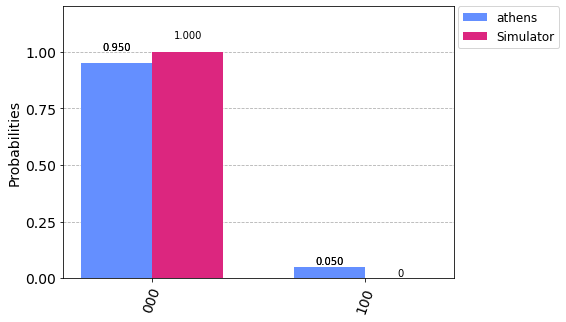

In [37]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circuit)
plot_histogram([counts_exp,counts], legend=['athens', 'Simulator'])

In [38]:
backend_melbourne = provider.get_backend('ibmq_16_melbourne')

Job Status: job has successfully run


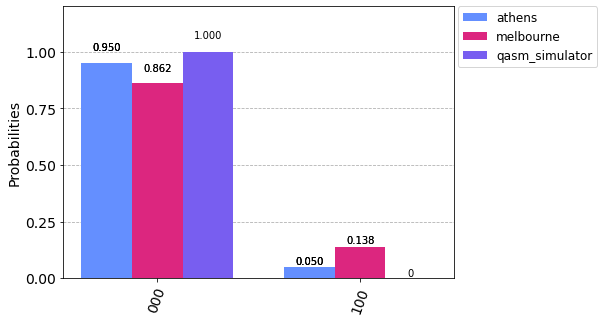

In [39]:
#execute job melbourne
job_exp_melbourne = execute(circuit, backend=backend_melbourne)
job_monitor(job_exp_melbourne)
result_exp_melbourne = job_exp_melbourne.result()
counts_exp_melbourne = result_exp_melbourne.get_counts(circuit)
plot_histogram([counts_exp,counts_exp_melbourne,counts], legend=['athens','melbourne','qasm_simulator'])